# Cyclistic Bike Share: Analyzing Rider Behavior

## Introduction

As a junior data analyst on the marketing analyst team at Cyclistic, I am tasked with analyzing the company's historical bike trip data to understand how casual riders and annual members use Cyclistic bikes differently. This analysis aims to identify trends and insights that will help design a new marketing strategy to convert casual riders into annual members. The project will follow the data analysis process of Ask, Prepare, Process, Analyze, Share, and Act, with the ultimate goal of presenting data-driven recommendations to the Cyclistic executive team.

## Ask



Some key questions will guide the development of Cyclistic's future marketing program. My task is to answer the question: 

**How do annual members and casual riders use Cyclistic bikes differently?**

### Business Task
The primary objective is to analyze the historical bike trip data to uncover how annual members and casual riders use Cyclistic bikes differently. The insights gained from this analysis will be used to inform marketing strategies aimed at converting casual riders into annual members, thereby increasing the company's profitability and customer retention.

### Stakeholders
The key stakeholders for this analysis include:
- **Lily Moreno:** Director of Marketing, responsible for developing campaigns and initiatives to promote Cyclistic.
- **Cyclistic Marketing Team:** A group of data analysts and marketers who will use the insights to craft marketing strategies.
- **Cyclistic Executive Team:** The decision-makers who will approve the recommended marketing strategies.

### Final Deliverables
The final deliverables will include a comprehensive analysis of the data, visualizations to support key findings, and three data-driven recommendations to help Cyclistic convert casual riders into annual members.


## Prepare


To analyze and identify trends, I used Cyclistic's historical trip data from recent months. This public data, provided by `Motivate International Inc.` under the appropriate license, allows me to explore how different customer types are using Cyclistic bikes. However, it is important to note that data-privacy issues prevent the use of personally identifiable information, meaning I cannot link purchases to specific customers or identify if casual riders live in the service area or have made multiple single-pass purchases.

The dataset is well-organized into Monthly Trip Data files. Each zip file (e.g., `202004-divvy-tripdata.zip`) contains a CSV file (e.g., `202004-divvy-tripdata.csv`) with essential attributes such as `ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, and member_casual`. These columns provide all the necessary information for analyzing ride patterns and behaviors, focusing on annual members and casual riders.

While the dataset is generally reliable, it does have some potential biases. As publicly available data, it may not perfectly reflect all geographic or demographic variations, and since personal identifiers have been removed, certain detailed analyses—such as demographics—cannot be performed.

#### **ROCCC Criteria**:

* **Reliable**: Sourced from Motivate International Inc.
* **Original**: Directly collected from Cyclistic’s bike-share system.
* **Comprehensive**: Includes a year's worth of data.
* **Current**: Data from the latest 12 months.
* **Cited**: Clearly cited licensing information and source.

In terms of licensing, the dataset is publicly available under the appropriate license from Motivate International Inc., with privacy safeguards ensuring personal data is excluded. The data is stored securely in accessible formats like CSV and ZIP files, making it easy to download and use.

To verify the integrity of the data, I conducted several checks. Missing values were identified, particularly in the station-related fields (start_station_name, start_station_id, end_station_name, end_station_id), and consistency checks were carried out to ensure the formatting was correct. I also validated file completeness by confirming that no files were truncated or corrupted.

The dataset is comprehensive enough to answer key questions about usage patterns, ride behaviors, and membership types, allowing me to draw meaningful insights for Cyclistic. However, some issues, such as incomplete records and anonymized data, limit the analysis to some extent.

In this phase, I also used tools like Google Sheets to explore and organize the data, sorting and filtering key fields to ensure the dataset was ready for deeper analysis.



- #### Sort and Filter the Data

    Sorted and filtered data to identify missing values and inconsistencies:

  - **Google Sheets:**
      
      Sorting data by 'start_station_name' and 'end_station_name'
    Menu Navigation: Data > Sort range > Advanced range sorting options
    Apply sorting to columns 'start_station_name' and 'end_station_name'
  
  - **Filtering for missing values**
  
         Menu Navigation: Data > Create a filter
    Apply filters to identify blanks in relevant columns
    
  - **Calculating Duration in Minutes**
  
      Formula: `=AVERAGE(FILTER(D2:D, ISNUMBER(D2:D)))` Where D2:D represents the column with trip durations
      
  
  - **Creating Pivot Table**
  
    Menu Navigation: Data > Pivot table
    Set rows to 'start_station_name' and 'end_station_name', values to count trips


## Process


In this phase, I focused on preparing the Cyclistic bike-share data for in-depth analysis. The goal was to ensure that the data was clean, consistent, and suitable for deriving meaningful insights. Both MySQL and Google Sheets were utilized to achieve this, with each tool serving specific purposes.

### Tool Selection

- **SQL**: Chosen for its efficiency in handling large datasets and performing complex queries.
- **Google Sheets**: Utilized for preliminary data processing tasks, including data integrity checks, summary statistics, and initial insights.

### Data Integrity Checks

#### Google Sheets

1. **Format Validation**:

   - **ride_id**: Verified using the `ISTEXT` function to ensure that IDs were in text format.
   - **started_at and ended_at**: Verified using the `ISDATE` function to confirm that the dates were correctly formatted.
   - **start_lat and start_lng**: Verified using the `ISNUMBER` function to ensure that latitude and longitude values were numeric.
   

2. **Blanks**:

   - Missing values in `start_station_name`, `start_station_id`, `end_station_name`, and `end_station_id` were identified and addressed using filters.
   - Removed rows with blank `start_station_name` and handled other missing values appropriately.
   

3. **Duplicate Entries**:

   - Checked and removed duplicate entries using Google Sheets' "Remove duplicates" feature.
   

4. **Duration Consistency**:

   - Calculated trip durations in minutes using the formula `=MOD((E2-C2)*24,1)*60` and checked for negative values using conditional formatting and filters.
   

5. **Geographical Consistency**:

   - Verified that latitude and longitude values fell within valid ranges using filters.
   

6. **Member vs. Casual User Check**:

   - Ensured that users were correctly categorized as either 'member' or 'casual' using filters.

**Summary Statistics in Google Sheets:**

- **Total Number of Trips**: 113,809
- **Most Popular Start Station**: Clinton St & Washington Blvd with 1,517 trips
- **Most Popular End Station**: Clinton St & Washington Blvd with 1,639 trips
- **Most Popular Rideable Type**: Classic with 76,525 trips
- **Average Trip Duration**: 9.76 minutes
- **Day of Week Analysis**: Created a `day_of_week` column using the formula `=WEEKDAY(C2, 1)`, allowing analysis of trip patterns across different days of the week.
- **Insights**:
  - **Total Trips**: `=COUNTA(A:A)`
  - **Average Trip Duration**: `=AVERAGE(P:P)`
  - Created a Pivot Table to analyze the most popular stations and rideable types.

#### SQL Processing

1. **Initial Data Import and Table Creation**:

Imported each dataset into SQL to create tables that preserved all columns from the raw data. For example, the SQL script for `tripdata_202401` was:
   
   
   ```sql
   
   CREATE DATABASE cyclistic_tripdata;
   USE cyclistic_tripdata;

   CREATE TABLE tripdata_202401 (
       ride_id VARCHAR(255) PRIMARY KEY,
       rideable_type VARCHAR(50),
       started_at DATETIME,
       ended_at DATETIME,
       start_station_name VARCHAR(255),
       start_station_id VARCHAR(50),
       end_station_name VARCHAR(255),
       end_station_id VARCHAR(50),
       start_lat DOUBLE,
       start_lng DOUBLE,
       end_lat DOUBLE,
       end_lng DOUBLE,
       member_casual VARCHAR(50)
   );
   
   
```

2. **Adding Derived Columns**:

Ride Length (`ride_length`): Calculated as the duration of each trip.


```sql

ALTER TABLE tripdata_202401 ADD COLUMN ride_length TIME;
UPDATE tripdata_202401 SET ride_length = TIMEDIFF(ended_at, started_at);


```

Day of Week (`day_of_week`): Identified the day of the week for each ride.

```sql

ALTER TABLE tripdata_202401 ADD COLUMN day_of_week INT;
UPDATE tripdata_202401 SET day_of_week = DAYOFWEEK(started_at);


```

3. **Data Quality Checks and Cleaning**:

Removing Trips with Negative Duration: Deleted records with negative `ride_length`.


   ```sql
   
 DELETE FROM tripdata_202401 WHERE ride_length < 0;
 
 
```

Handling Missing Values: Replaced missing values in station columns with 'UNKNOWN'.

  ```sql
  
UPDATE tripdata_202401 SET start_station_name = 'UNKNOWN' WHERE start_station_name IS NULL;
UPDATE tripdata_202401 SET start_station_id = 'UNKNOWN' WHERE start_station_id IS NULL;
UPDATE tripdata_202401 SET end_station_name = 'UNKNOWN' WHERE end_station_name IS NULL;
UPDATE tripdata_202401 SET end_station_id = 'UNKNOWN' WHERE end_station_id IS NULL;


```

Replaced blank values with 'UNKNOWN':


  ```sql
  
UPDATE tripdata_202401 SET start_station_name = 'UNKNOWN' WHERE TRIM(start_station_name) = '';
UPDATE tripdata_202401 SET start_station_id = 'UNKNOWN' WHERE TRIM(start_station_id) = '';
UPDATE tripdata_202401 SET end_station_name = 'UNKNOWN' WHERE TRIM(end_station_name) = '';
UPDATE tripdata_202401 SET end_station_id = 'UNKNOWN' WHERE TRIM(end_station_id) = '';


```


Standardizing Text Fields: Converted station names to uppercase for consistency.
   

  ```sql
  
UPDATE tripdata_202401 SET start_station_name = UPPER(start_station_name), end_station_name = UPPER(end_station_name);


```

Handling Long Duration Trips: Removed trips lasting over 24 hours.


  ```sql
  
DELETE FROM tripdata_202401 WHERE TIME_TO_SEC(ride_length) / 60 > 1440;


```

4. **Stations with Missing Return Trips**:

Identified stations where trips started but no corresponding trips ended.

```sql
   
SELECT COUNT(*) 
FROM tripdata_202401
WHERE end_station_name NOT IN (SELECT DISTINCT start_station_name FROM tripdata_202401);


```

Revealed 95 such stations in the tripdata_202401 dataset. Similar queries were run for other months.


5. **Summary Statistics**:

* After cleaning and merging the datasets, key statistics were computed:

     - Total Number of Trips: 564,012
     - Most Popular Start Station: Clinton St & Washington Blvd with 1,517 trips
     - Most Popular End Station: Clinton St & Washington Blvd with 1,639 trips
     - Most Popular Rideable Type: Classic with 76,525 trips
     - Average Trip Duration: 9.76 minutes

6. **Final Data Verification**:

* Performed final checks to ensure data integrity:

```sql
SELECT * FROM tripdata_202401 LIMIT 10;
SELECT * FROM tripdata_202405 LIMIT 10;
SELECT * FROM tripdata_202406 LIMIT 10;
SELECT * FROM tripdata_202407 LIMIT 10;
```


### Conclusion

Through meticulous data cleaning and transformation using SQL and Google Sheets, the Cyclistic trip data was refined into a reliable and consistent dataset. This prepared dataset is now ready for in-depth analysis to derive meaningful insights and inform marketing strategies aimed at converting casual riders into annual members.

## Analyze


### Common Analysis

The Common Analysis phase of this project focuses on analyzing Cyclistic trip data for `January, May, June, and July 2024`. The primary goal is to understand how annual members and casual riders use Cyclistic bikes differently. I performed a series of `SQL` queries using `MySQL` to clean, structure, and analyze the dataset. The dataset contains detailed ride information, such as start times, end times, ride durations, and station usage, which were crucial in uncovering usage patterns, ride durations, and popular ride days for both user groups.

Additionally, I utilized `R` for visualizations based on the query results obtained from `MySQL`. By leveraging these tools, I efficiently handled the data to identify trends, explore relationships between key variables, and gain actionable insights for the business.

In [29]:
library(ggplot2)
library(readr)
library(tidyr)
library(scales)
library(dplyr)

**Step 1: Combining Datasets**:

To ensure a unified dataset for analysis, I started by combining four months of trip data (January, May, June, and July) into a single dataset using the following query:

```sql

WITH cte AS(
  SELECT * FROM tripdata_202401
  UNION ALL
  SELECT * FROM tripdata_202405
  UNION ALL
  SELECT * FROM tripdata_202406
  UNION ALL
  SELECT * FROM tripdata_202407
)
SELECT COUNT(DISTINCT ride_id) FROM cte;


```

result:

```sql

| count(distinct ride_id) |
|-------------------------|
| 564012                  |


```


This `CTE (Common Table Expression)` helped combine multiple tables into one and calculated the total number of distinct rides. The result was `564,012` unique rides across all four months.

Next, I wanted to understand how many unique rides occurred from May to July, which yielded `452,940` unique rides using this query:

```sql

WITH cte AS (
    SELECT * FROM tripdata_202405
    UNION ALL
    SELECT * FROM tripdata_202406
    UNION ALL
    SELECT * FROM tripdata_202407
)
SELECT COUNT(DISTINCT ride_id) AS unique_ride_count
FROM cte;


```

result:

```sql

| unique_ride_count |
|-------------------|
| 452940            |


```

```sql

SELECT 564012-452940;


```

result:

```sql

| 564012 - 452940 |
|-----------------|
| 111072          |


```

Subtracting the two counts showed that there were `111,072` rides in January.

In [30]:
monthly_ride_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/1-month_tripcount.csv")

Rows: 4 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (1): ride_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


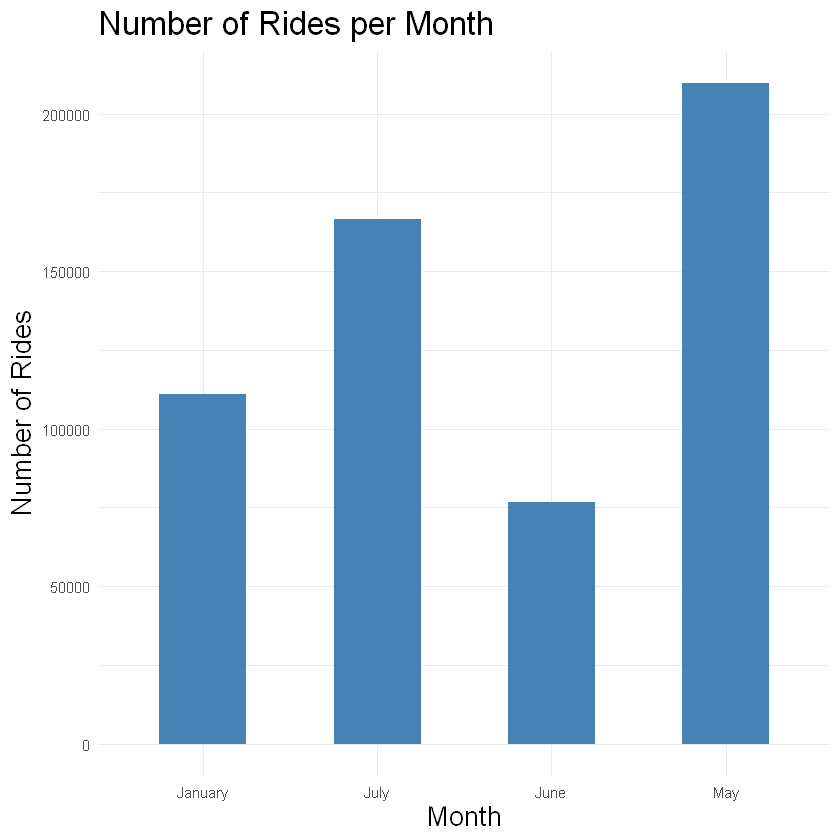

In [31]:
ggplot(monthly_ride_data, aes(x = month, y = ride_count)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.5) +
  labs(title = "Number of Rides per Month",
       x = "Month",
       y = "Number of Rides") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0),  
    axis.title.x = element_text(size = 16),           
    axis.title.y = element_text(size = 16)           
  )

**Step 2: Creating a Combined Table**:

To facilitate further analysis, I created a new table that consolidates all four months' trip data:

```sql

CREATE TABLE combined_tripdata AS
SELECT * FROM tripdata_202401
UNION ALL
SELECT * FROM tripdata_202405
UNION ALL
SELECT * FROM tripdata_202406
UNION ALL
SELECT * FROM tripdata_202407;


```

The combined_tripdata table now holds all data from `January, May, June, and July` for easier querying and analysis.



**Step 3: Data Cleaning**:

To ensure data accuracy and consistency, the dataset underwent a thorough cleaning process, which included replacing blank station names with 'UNKNOWN' and removing rows with negative ride lengths. After these steps, the dataset contained 551,083 valid rides, ready for analysis.


**Step 4: Adding and Processing Ride Length in Minutes**:

Since the original `ride_length` column was in seconds, I added a new column called `ride_length_minutes` to convert ride lengths into minutes, which would make the analysis easier and more intuitive:

```sql

ALTER TABLE combined_tripdata ADD COLUMN ride_length_minutes DECIMAL(10, 2);

UPDATE combined_tripdata
SET ride_length_minutes = ROUND(TIME_TO_SEC(ride_length) / 60, 2);


```

After running this query, I was able to confirm the ride lengths in minutes. For example, a few entries had ride lengths like `5.08, 42.60, 14.65 minutes`, and so on.

**Step 5: Removing Outliers**:

In this step, I eliminated outliers by removing any rides longer than `720 minutes (12 hours)` and any rides shorter than `1 minute`. These are considered extreme or invalid data points:

```sql

DELETE FROM combined_tripdata
WHERE ride_length_minutes > 720;

DELETE FROM combined_tripdata
WHERE ride_length_minutes <= 1;


```

These steps ensured that the dataset only contains valid and reasonable ride durations.



**Step 6: Summary Statistics**:

To gain insights into the average ride length, I calculated the mean ride length for all valid trips in the dataset:

```sql

SELECT ROUND(AVG(ride_length_minutes), 2) AS avg_ride_length_minutes
FROM combined_tripdata;


```

result:

```sql

| avg_ride_length_minutes  |
|--------------------------|
| 15.92                    |


```

The average ride length was `15.92 minutes`, providing a good reference point for further comparisons between members and casual riders.

Additionally, I checked the maximum and minimum ride lengths:

```sql
SELECT MAX(ride_length_minutes) AS max_ride_length_minutes FROM combined_tripdata;
```

result:

```sql

| max_ride_length_minutes  |
|--------------------------|
| 718.10                   |


```

```sql
SELECT MIN(ride_length_minutes) AS min_ride_length_minutes FROM combined_tripdata;

```

result:

```sql

| min_ride_length_minutes  |
|--------------------------|
| 1.02                     |


```

This confirmed that rides longer than `720 minutes` had been successfully removed, with the maximum remaining ride length being `718.10 minutes`.

**Step 7: Ride Duration Distribution**:

To analyze ride duration, the data was segmented into two groups: 

rides above and below `120 minutes`, further split by user type (member or casual).

```sql

SELECT 
    CASE 
        WHEN ride_length_minutes > 120 THEN 'Above 120 minutes'
        ELSE 'Below 120 minutes'
    END AS duration_group, 
    member_casual,
    COUNT(ride_id) AS number_of_rides
FROM combined_tripdata
GROUP BY duration_group, member_casual;


```

result:

```sql

| duration_group        | member_casual  | number_of_rides  |
|-----------------------|----------------|------------------|
| Below 120 minutes     | member         | 356482           |
| Below 120 minutes     | casual         | 190997           |
| Above 120 minutes     | casual         | 3012             |
| Above 120 minutes     | member         | 597              |


```

**Key findings**:

Members:

* `356,482` rides under `120 minutes`.
* `597` rides over `120 minutes`.

Casual Riders:

* `190,997` rides under `120 minutes`.
* `3,012` rides over `120 minutes`.

This analysis shows that casual riders tend to have significantly longer trips, with more rides exceeding `120 minutes`, compared to members.

In [32]:
ride_comparison_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/pivot data/3-ride_id_member_casual_ride_length_minutes(pivot).csv")

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): member_casual
dbl (2): Above_120, Below_120

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
colnames(ride_comparison_data)

[1] "member_casual" "Above_120"     "Below_120"

In [34]:
long_data <- ride_comparison_data %>%
  pivot_longer(cols = c(Above_120, Below_120), 
               names_to = "duration_group", 
               values_to = "number_of_rides")

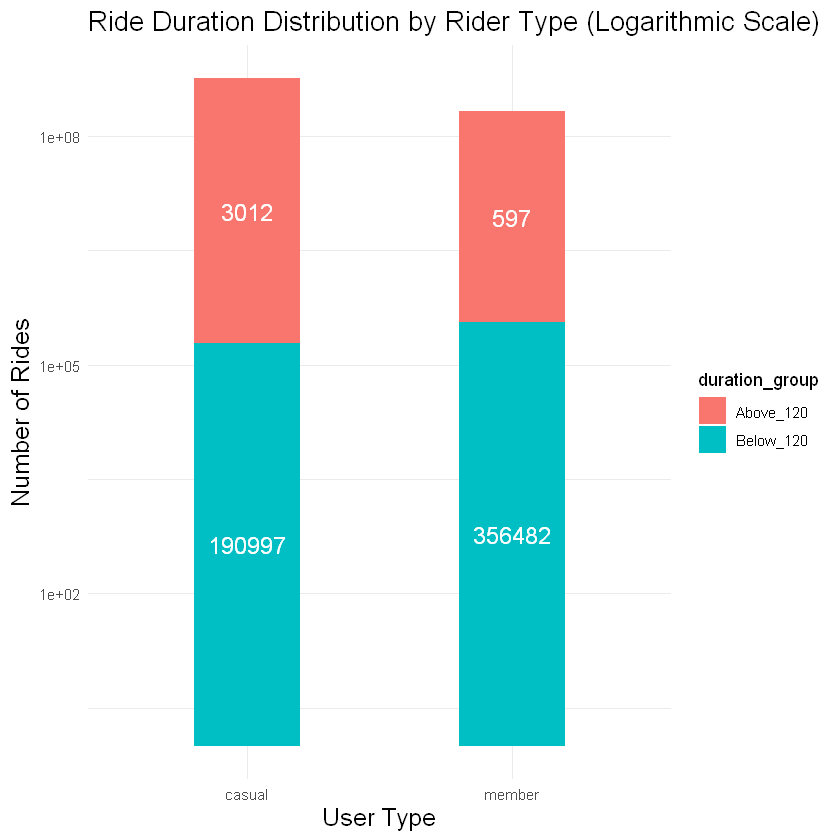

In [35]:
ggplot(long_data, aes(x = member_casual, y = number_of_rides, fill = duration_group)) +
  geom_bar(stat = "identity", width = 0.4) +  
  geom_text(aes(label = number_of_rides), 
            position = position_stack(vjust = 0.5),   
            color = "white", size = 5) +              
  labs(title = "Ride Duration Distribution by Rider Type (Logarithmic Scale)",
       x = "User Type",
       y = "Number of Rides") +
  scale_y_log10(breaks = scales::breaks_log(n = 5)) +  
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, hjust = 0), 
    axis.title.x = element_text(size = 15),           
    axis.title.y = element_text(size = 15)            
  )

### Indepth Analysis

The indepth analysis delves into various aspects of Cyclistic's bike usage data, focusing on ride lengths, hourly usage patterns, station usage, and correlations with member types. This comprehensive approach helps to identify key trends and actionable insights.

**Step-1-Distribution of Ride Lengths**:

**Percentile Analysis**: 

To understand the distribution of ride lengths more thoroughly, I analyzed the data using percentiles.

```sql

WITH RankedData AS (
    SELECT
        ride_length_minutes,
        NTILE(100) OVER (ORDER BY ride_length_minutes) AS percentile_rank
    FROM combined_tripdata
)
SELECT
    MAX(CASE WHEN percentile_rank <= 25 THEN ride_length_minutes END) AS p25,
    MAX(CASE WHEN percentile_rank <= 50 THEN ride_length_minutes END) AS p50,
    MAX(CASE WHEN percentile_rank <= 75 THEN ride_length_minutes END) AS p75
FROM RankedData;


```

result:

```sql

| p25  | p50  | p75  |
|------|------|------|
| 5.95 | 10.25| 18.18|


```

Percentile Values:

p25: `5.95 minutes`

p50: `10.25 minutes`

p75: `18.18 minutes`


**Key findings**:

The median ride length is just over `10 minutes`, indicating that `50%` of rides are relatively short.

`25%` of rides are even shorter than around `6 minutes`, suggesting frequent short trips.

**Percentile Analysis by Member Type**: 

I segmented the data by member type to observe differences in ride lengths.

```sql

WITH RankedData AS (
    SELECT
        member_casual,
        ride_length_minutes,
        NTILE(100) OVER (PARTITION BY member_casual ORDER BY ride_length_minutes) AS percentile_rank
    FROM combined_tripdata
)
SELECT
    member_casual,
    MAX(CASE WHEN percentile_rank <= 25 THEN ride_length_minutes END) AS p25,
    MAX(CASE WHEN percentile_rank <= 50 THEN ride_length_minutes END) AS p50,
    MAX(CASE WHEN percentile_rank <= 75 THEN ride_length_minutes END) AS p75
FROM RankedData
GROUP BY member_casual;


```
result:

```sql

| member_casual  | p25  | p50  | p75  |
|----------------|------|------|------|
| casual         | 7.58 | 13.45| 25.18|
| member         | 5.37 | 9.02 | 15.25|


```

**Percentile Values**:

Casual Riders:

p25: `7.58 minutes`

p50: `13.45 minutes`

p75: `25.18 minutes`

Members:

p25: `5.37 minutes`

p50: `9.02 minutes`

p75: `15.25 minutes`


**Key findings**:

Casual riders tend to take longer rides compared to members, especially in the upper percentiles.



In [36]:
percentile_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/7-percentile_membr_casual.csv")

Rows: 2 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): member_casual
dbl (3): p25, p50, p75

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
percentile_long <- percentile_data %>%
  gather(key = "percentile", value = "ride_length", p25, p50, p75)

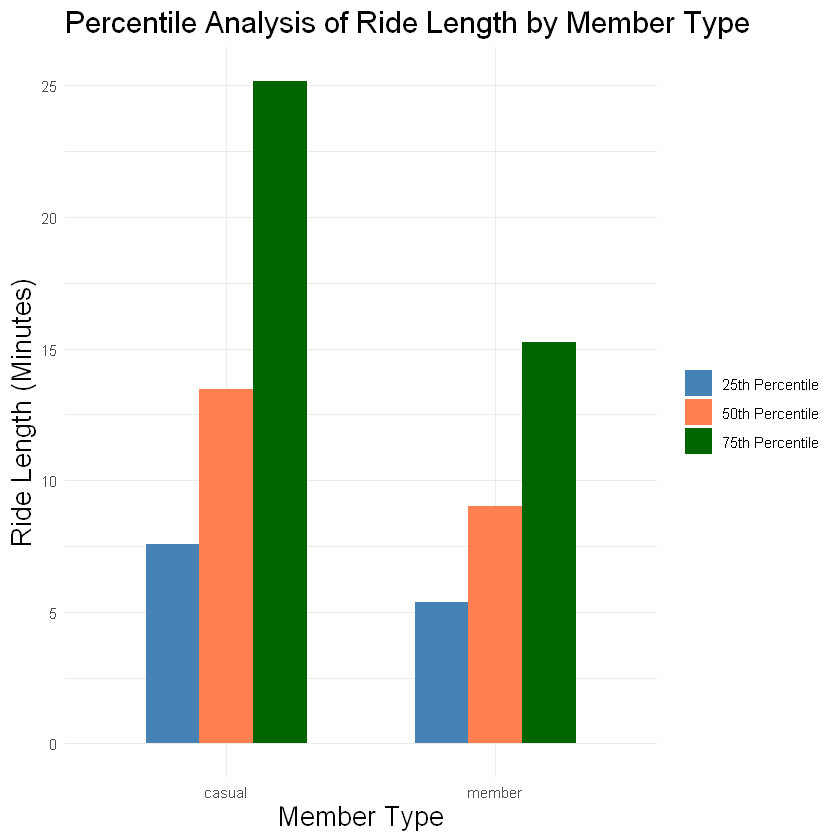

In [38]:
ggplot(percentile_long, aes(x = member_casual, y = ride_length, fill = percentile)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.6) +
  labs(title = "Percentile Analysis of Ride Length by Member Type",
       x = "Member Type",
       y = "Ride Length (Minutes)") +
  scale_fill_manual(values = c("steelblue", "coral", "darkgreen"), 
                    labels = c("25th Percentile", "50th Percentile", "75th Percentile")) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, hjust = 0),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    legend.title = element_blank()
  )

**Step-2-Hourly Usage Patterns**:

**Ride Count by Hour of Day**:

To determine peak usage times, I added an hour_of_day column and analyzed ride counts.

```sql
ALTER TABLE combined_tripdata ADD COLUMN hour_of_day INT;

UPDATE combined_tripdata
SET hour_of_day = HOUR(started_at);

SELECT 
    HOUR(started_at) AS hour_of_day,
    member_casual,
    COUNT(ride_id) AS number_of_rides
FROM combined_tripdata
GROUP BY hour_of_day, member_casual
ORDER BY hour_of_day, member_casual;

```

result:

```sql

| hour_of_day | member_casual | number_of_rides  |
|-------------|---------------|------------------|
| 0           | casual        | 3049             |
| 0           | member        | 2891             |
| 1           | casual        | 2148             |
| 1           | member        | 1722             |
| 2           | casual        | 1362             |
| 2           | member        | 1021             |
| 3           | casual        | 693              |
| 3           | member        | 676              |
| 4           | casual        | 501              |
| 4           | member        | 827              |
| 5           | casual        | 1173             |
| 5           | member        | 3893             |
| 6           | casual        | 2434             |
| 6           | member        | 10980            |
| 7           | casual        | 4497             |
| 7           | member        | 20026            |
| 8           | casual        | 6461             |
| 8           | member        | 24364            |
| 9           | casual        | 6397             |
| 9           | member        | 16151            |
.
.
.
-- upto 23 hours


```

**Peak Hours**:

`6 AM to 9 AM`: High ride counts, especially among members.

`4 PM to 7 PM`: Also peak times with high counts for both members and casual riders.

**Key findings**:

Members use bikes more frequently during peak commuting hours compared to casual riders.

In [39]:
hourly_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/8-hour_of_day_member_casual_number_of_rides.csv")

Rows: 48 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): member_casual
dbl (2): hour_of_day, number_of_rides

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


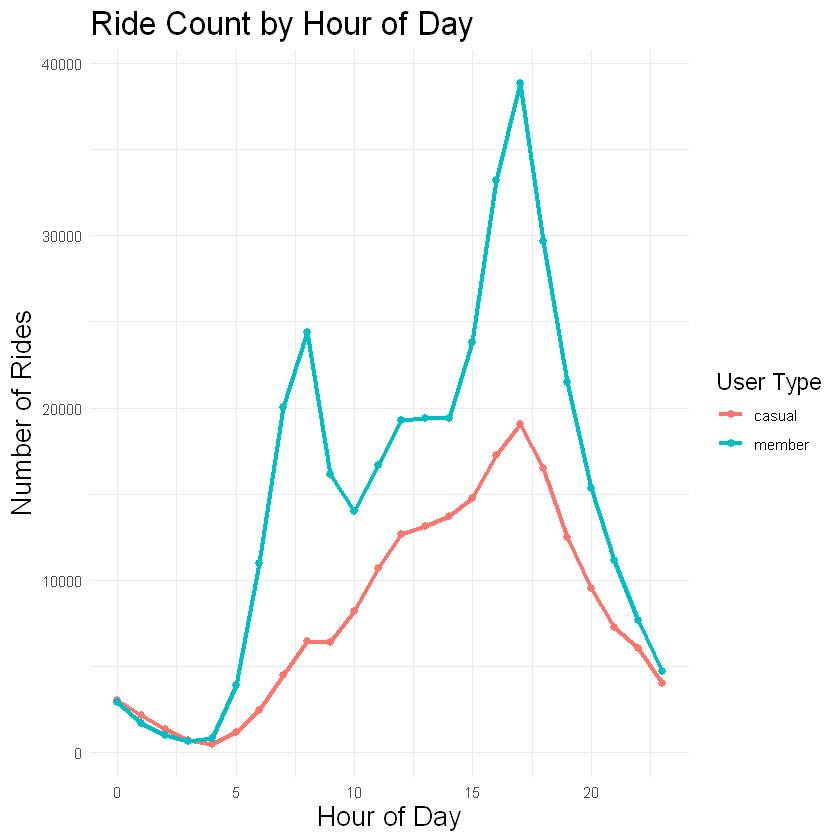

In [40]:
ggplot(hourly_data, aes(x = hour_of_day, y = number_of_rides, color = member_casual, group = member_casual)) +
  geom_line(size = 1.2) +  
  geom_point(size = 2) +   
  labs(title = "Ride Count by Hour of Day",
       x = "Hour of Day",
       y = "Number of Rides",
       color = "User Type") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0),  
    axis.title.x = element_text(size = 16),          
    axis.title.y = element_text(size = 16),          
    legend.title = element_text(size = 14)            
  )

**Ride Counts by Hour and Day**:

To analyze ride counts across different days of the week and hours of the day, I categorized the data by both hour_of_day and day_of_week, enabling a comprehensive understanding of usage patterns.


```sql

SELECT 
    HOUR(started_at) AS hour_of_day,
    CASE 
        WHEN day_of_week = 1 THEN 'Sunday'
        WHEN day_of_week = 2 THEN 'Monday'
        WHEN day_of_week = 3 THEN 'Tuesday'
        WHEN day_of_week = 4 THEN 'Wednesday'
        WHEN day_of_week = 5 THEN 'Thursday'
        WHEN day_of_week = 6 THEN 'Friday'
        WHEN day_of_week = 7 THEN 'Saturday'
    END AS day_name,
    member_casual,
    COUNT(ride_id) AS number_of_rides
FROM combined_tripdata
GROUP BY hour_of_day, day_of_week, member_casual
ORDER BY hour_of_day, day_of_week, member_casual;


```

result:

```sql

| hour_of_day | day_name | member_casual  | number_of_rides  |
|-------------|----------|----------------|------------------|
| 0           | Sunday   | casual         | 741              |
| 0           | Sunday   | member         | 662              |
| 0           | Monday   | casual         | 321              |
| 0           | Monday   | member         | 337              |
| 0           | Tuesday  | casual         | 189              |
| 0           | Tuesday  | member         | 238              |
| 0           | Wednesday| casual         | 252              |
| 0           | Wednesday| member         | 248              |
| 0           | Thursday | casual         | 372              |
| 0           | Thursday | member         | 322              |
| 0           | Friday   | casual         | 409              |
| 0           | Friday   | member         | 423              |
| 0           | Saturday | casual         | 765              |
| 0           | Saturday | member         | 661              |
| 1           | Sunday   | casual         | 494              |
| 1           | Sunday   | member         | 404              |
| 1           | Monday   | casual         | 313              |
| 1           | Monday   | member         | 248              |
| 1           | Tuesday  | casual         | 129              |
| 1           | Tuesday  | member         | 117              |
.
.
.
-- upto 23 hours


```

**Key Findings**:

Peak Usage Days: Weekdays, particularly `Monday to Friday`, exhibit higher ride counts compared to weekends, with `Saturday` being the busiest day for casual riders.

Hourly Trends: The highest ride counts occur during morning (`7 AM to 10 AM`) and evening (`4 PM to 7 PM`) peak hours, with members showing consistent usage during these times while casual riders display increased activity on weekends.

In [41]:
heatmap_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/9-hour_of_day_day_of_week_member_casual_number_of_rides.csv")

Rows: 336 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): day_name, member_casual
dbl (2): hour_of_day, number_of_rides

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


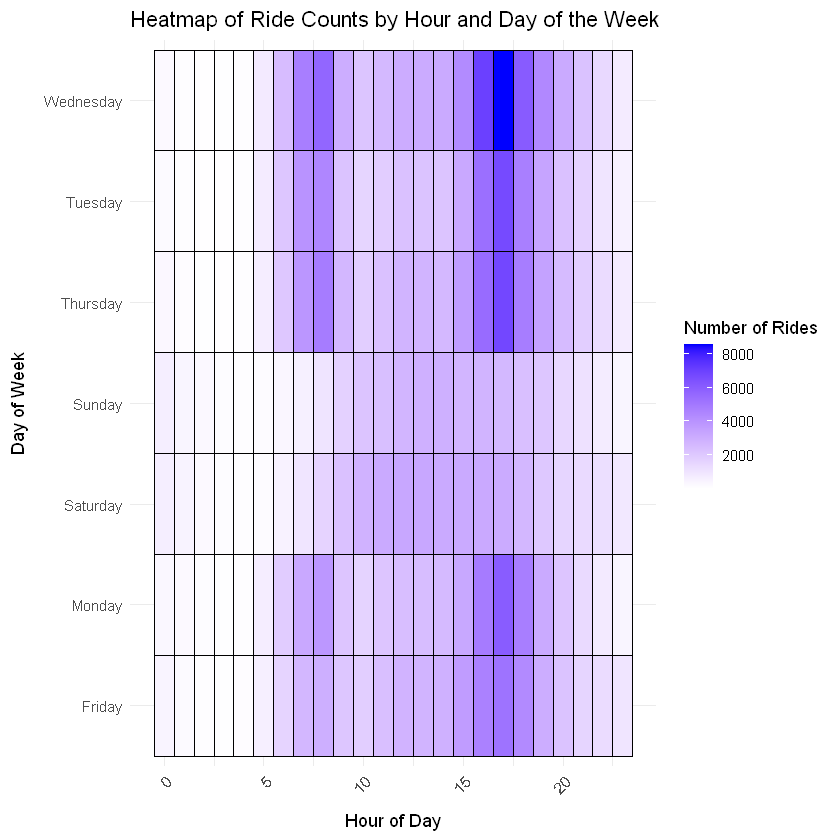

In [42]:
ggplot(heatmap_data, aes(x = hour_of_day, y = day_name, fill = number_of_rides)) +
  geom_tile(color = "black") +  
  scale_fill_gradient(low = "white", high = "blue") +  
  labs(title = "Heatmap of Ride Counts by Hour and Day of the Week", 
       x = "Hour of Day", 
       y = "Day of Week", 
       fill = "Number of Rides") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    axis.title.x = element_text(margin = margin(t = 10)),  
    axis.title.y = element_text(margin = margin(r = 10))  
  )

**Step-3-Station Usage**:

**Top Start Stations**:

```sql

SELECT start_station_name, COUNT(*) AS trip_count
FROM combined_tripdata
GROUP BY start_station_name
ORDER BY trip_count DESC
LIMIT 10;


```
result:

```sql

| start_station_name                         | trip_count |
|--------------------------------------------|------------|
| DUSABLE LAKE SHORE DR & NORTH BLVD         | 6203       |
| STREETER DR & GRAND AVE                    | 5021       |
| KINGSBURY ST & KINZIE ST                   | 4872       |
| CLARK ST & ELM ST                          | 4767       |
| MICHIGAN AVE & OAK ST                      | 4403       |
| ASHLAND AVE & DIVISION ST                  | 3934       |
| WABASH AVE & GRAND AVE                     | 3927       |
| DUSABLE HARBOR                             | 3872       |
| STATE ST & CHICAGO AVE                     | 3712       |
| CLARK ST & WRIGHTWOOD AVE                  | 3591       |


```

**Top Start Stations**:

`DUSABLE LAKE SHORE DR & NORTH BLVD: 6,203 rides`

`STREETER DR & GRAND AVE: 5,021 rides`





In [43]:
start_station_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/10-ssn_trip_count.csv")

Rows: 10 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): start_station_name
dbl (1): trip_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


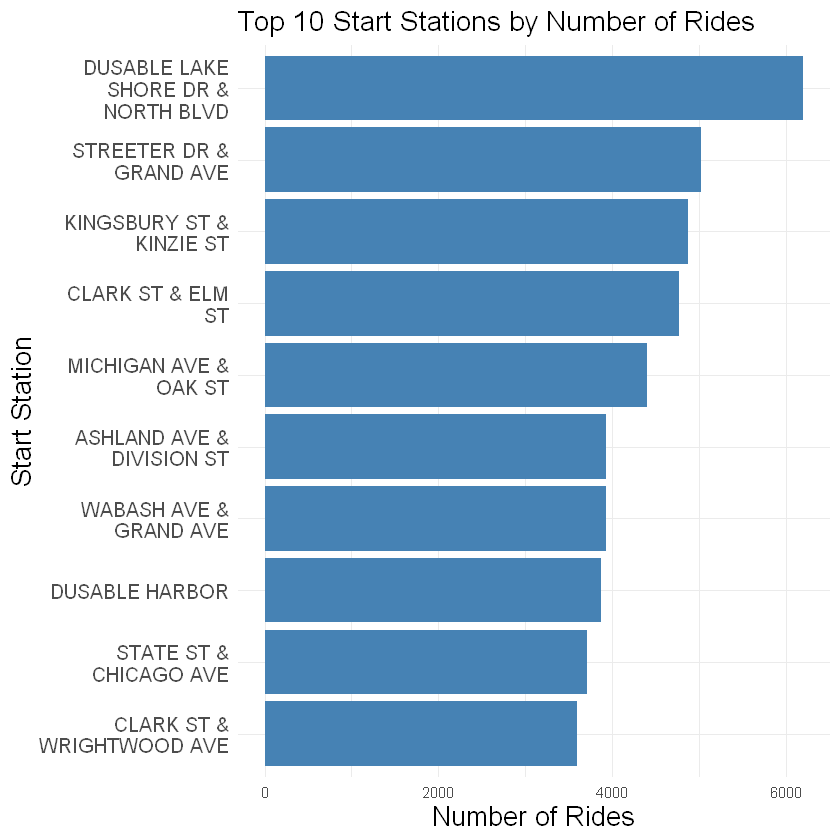

In [44]:
ggplot(start_station_data, aes(x = trip_count, y = reorder(start_station_name, trip_count))) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Top 10 Start Stations by Number of Rides",
       x = "Number of Rides",
       y = "Start Station") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 17, hjust = 0),  
    axis.title.x = element_text(size = 16),          
    axis.title.y = element_text(size = 16),           
    axis.text.y = element_text(size = 12)             
  ) +
  scale_y_discrete(labels = wrap_format(15))  

**Top End Stations**:

```sql

SELECT end_station_name, COUNT(*) AS trip_count
FROM combined_tripdata
GROUP BY end_station_name
ORDER BY trip_count DESC
LIMIT 10;


```
result:

```sql

| end_station_name                           | trip_count |
|--------------------------------------------|------------|
| STREETER DR & GRAND AVE                    | 12603      |
| DUSABLE LAKE SHORE DR & NORTH BLVD         | 8391       |
| HALSTED ST & CLYBOURN AVE                  | 4626       |
| INDIANA AVE & ROOSEVELT RD                 | 4465       |
| DEARBORN PKWY & DELAWARE PL                | 4342       |
| CLINTON ST & JACKSON BLVD                  | 4215       |
| SHEFFIELD AVE & FULLERTON AVE              | 3583       |
| MLK JR DR & 29TH ST                        | 3567       |
| CLARK ST & NORTH AVE                       | 3560       |
| SEDGWICK ST & WEBSTER AVE                  | 3545       |


```

**Top End Stations**:

`STREETER DR & GRAND AVE: 12,603 rides`

`DUSABLE LAKE SHORE DR & NORTH BLVD: 8,391 rides`



In [45]:
end_station_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/11-esn_trip_count.csv")

Rows: 10 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): end_station_name
dbl (1): trip_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


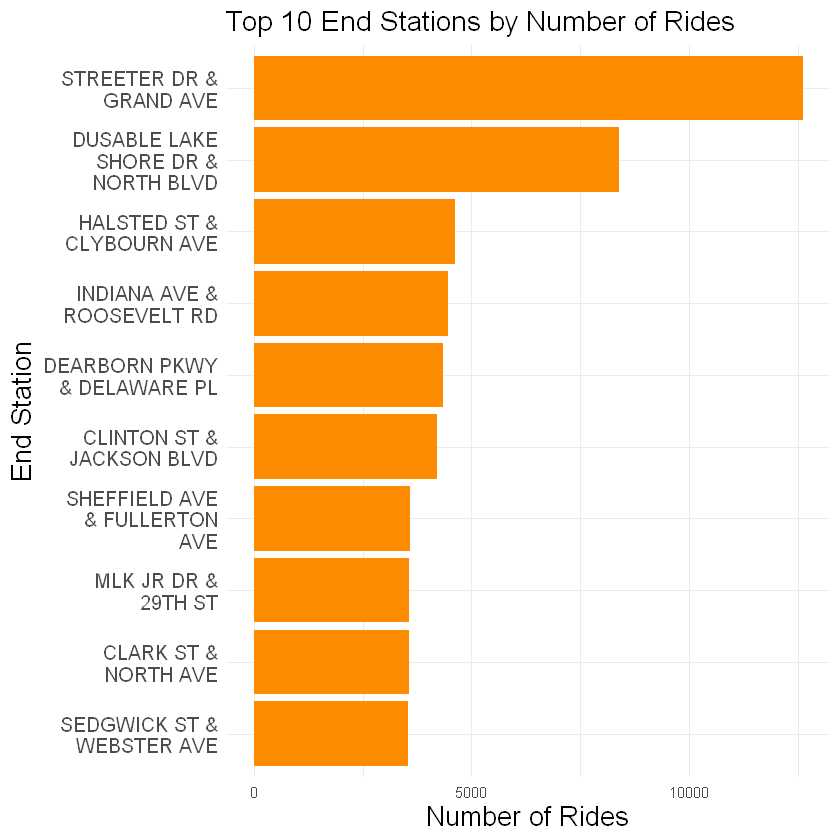

In [46]:
ggplot(end_station_data, aes(x = trip_count, y = reorder(end_station_name, trip_count))) +
  geom_bar(stat = "identity", fill = "darkorange") +
  labs(title = "Top 10 End Stations by Number of Rides",
       x = "Number of Rides",
       y = "End Station") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 17, hjust = 0),  
    axis.title.x = element_text(size = 16),           
    axis.title.y = element_text(size = 16),           
    axis.text.y = element_text(size = 12)           
  ) +
  scale_y_discrete(labels = wrap_format(15)) 

**Step-4-Correlation Analysis**:

Correlation Between Ride Length and Day of the Week:

```sql

SELECT 
    ROUND((COUNT(*) * SUM(ride_length_minutes * day_of_week) - SUM(ride_length_minutes) * SUM(day_of_week)) /
    (SQRT((COUNT(*) * SUM(ride_length_minutes * ride_length_minutes) - SUM(ride_length_minutes) * SUM(ride_length_minutes)) *
          (COUNT(*) * SUM(day_of_week * day_of_week) - SUM(day_of_week) * SUM(day_of_week)))), 5) AS correlation
FROM combined_tripdata;


```

result:

```sql

| correlation |
|-------------|
| 0.0269      |


```

**Correlation coefficient**: 0.0269

The correlation coefficient is quite low (close to 0), indicating a very weak positive relationship between ride length and the day of the week. This suggests that the length of rides does not vary significantly across different days of the week.



In [47]:
main_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/12-ride_length_minutes_day_of_week_rideable_type.csv")

Rows: 551088 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): rideable_type
dbl (2): ride_length_minutes, day_of_week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [48]:
avg_length_by_day <- main_data %>%
  group_by(day_of_week) %>%
  summarize(avg_ride_length_minutes = mean(ride_length_minutes, na.rm = TRUE))

In [49]:
print(avg_length_by_day)

# A tibble: 7 × 2
  day_of_week avg_ride_length_minutes
        <dbl>                   <dbl>
1           1                    18.9
2           2                    14.7
3           3                    13.7
4           4                    14.4
5           5                    14.5
6           6                    15.9
7           7                    20.0


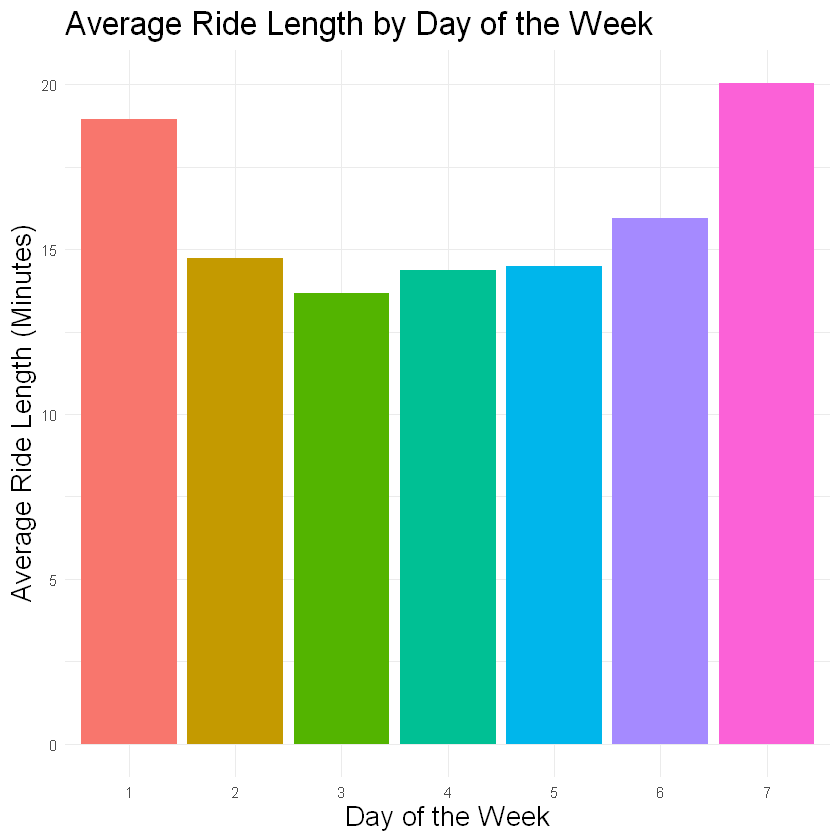

In [50]:
ggplot(avg_length_by_day, aes(x = factor(day_of_week), y = avg_ride_length_minutes, fill = factor(day_of_week))) +
  geom_bar(stat = "identity") +  # Create bars
  labs(title = "Average Ride Length by Day of the Week",
       x = "Day of the Week",
       y = "Average Ride Length (Minutes)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0),  
    axis.title.x = element_text(size = 16),          
    axis.title.y = element_text(size = 16),          
    legend.position = "none"                          
  )

**Ride Length by Rideable Type**:

```sql

SELECT rideable_type, ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY rideable_type;


```
result:

```sql

| rideable_type  | avg_ride_length_minutes       |
|----------------|-------------------------------|
| Electric Bike  | 13.24                         |
| Classic Bike   | 17.93                         |


```

**Ride Length Values**:

`Electric Bike: 13.24 minutes`

`Classic Bike: 17.93 minutes`





In [51]:
rideable_data <- main_data %>%
  group_by(rideable_type) %>%
  summarize(avg_ride_length_minutes = mean(ride_length_minutes, na.rm = TRUE))

In [52]:
str(rideable_data)

tibble [2 × 2] (S3: tbl_df/tbl/data.frame)
 $ rideable_type          : chr [1:2] "classic_bike" "electric_bike"
 $ avg_ride_length_minutes: num [1:2] 17.9 13.2


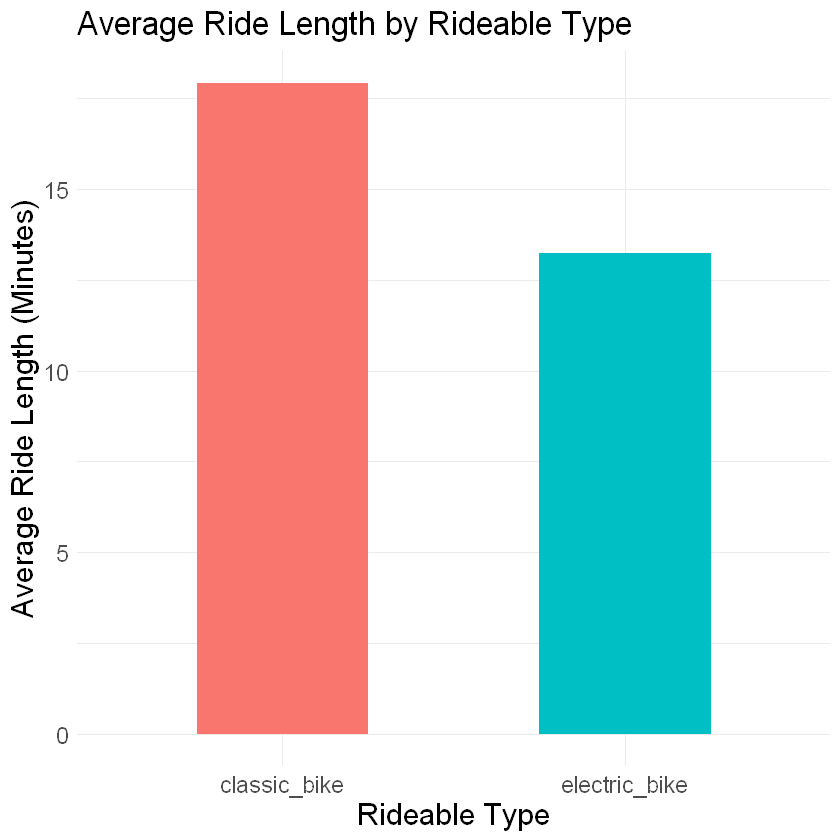

In [53]:
ggplot(rideable_data, aes(x = rideable_type, y = avg_ride_length_minutes, fill = rideable_type)) +
  geom_bar(stat = "identity", width = 0.5) +  
  labs(title = "Average Ride Length by Rideable Type",
       x = "Rideable Type",
       y = "Average Ride Length (Minutes)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0),           
    axis.title.x = element_text(size = 18),                    
    axis.title.y = element_text(size = 18),                    
    axis.text.x = element_text(size = 14),                      
    axis.text.y = element_text(size = 14),                      
    legend.position = "none"                                  
  )

**Ride Length by Member Type**:

```sql

SELECT member_casual, ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY member_casual;


```

result:

```sql

| member_casual | avg_ride_length_minutes |
|---------------|-------------------------|
| member        | 12.43                   |
| casual        | 22.36                   |


```

**Member Type Values**:

`Member: 12.43 minutes`

`Casual: 22.36 minutes`



**Ride Length and Start Time (Hour of Day)**:

```sql

SELECT HOUR(started_at) AS hour_of_day, ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY hour_of_day
ORDER BY hour_of_day;


```

result:

```sql

| hour_of_day | avg_ride_length_minutes |
|-------------|-------------------------|
| 0           | 15.52                   |
| 1           | 16.80                   |
| 2           | 17.53                   |
| 3           | 13.87                   |
| 4           | 13.51                   |
| 5           | 11.56                   |
| 6           | 11.44                   |
| 7           | 12.40                   |
| 8           | 12.66                   |
| 9           | 15.05                   |
.
.
.
-- upto 23 hours


```

**Key findings**:

Casual riders tend to have longer rides during mid-day hours (`10 AM to 3 PM`).
Members show more consistent ride lengths throughout the day with slightly shorter average ride lengths.


**Hourly Ride Lengths by Member Type**:

```sql

SELECT member_casual,HOUR(started_at) AS hour_of_day, ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY member_casual,hour_of_day
ORDER BY avg_ride_length_minutes desc;


```

result
(in same table):

```sql

-- Casual-

|member_casual| Hour of Day | Average Ride Length (Minutes) |
|-------------|-------------|-------------------------------|
| Casual      | 0           | 19.01                         |
| Casual      | 1           | 19.72                         |
| Casual      | 2           | 20.73                         |
| Casual      | 3           | 16.12                         |
| Casual      | 4           | 15.44                         |
| Casual      | 5           | 13.56                         |
| Casual      | 6           | 14.15                         |
| Casual      | 7           | 15.84                         |
| Casual      | 8           | 16.88                         |
| Casual      | 9           | 23.87                         |
.
.
.
-- upto 23 hours

-- Member-

| Member      | 0           | 11.85                         |
| Member      | 1           | 13.15                         |
| Member      | 2           | 13.26                         |
| Member      | 3           | 11.57                         |
| Member      | 4           | 12.35                         |
| Member      | 5           | 10.95                         |
| Member      | 6           | 10.84                         |
| Member      | 7           | 11.63                         |
| Member      | 8           | 11.54                         |
| Member      | 9           | 11.55                         |
.
.
.
-- upto 23 hours


```

**Key findings**:

Casual riders have significantly longer average ride lengths compared to members during the mid-day hours.


#### Conclusion

This analysis provides deep insights into rider behavior, patterns, and preferences based on key factors like ride length, time of day, and membership type. Each section highlights areas where marketing, operations, or pricing strategies can be fine-tuned to enhance user experience and optimize service delivery. These findings are crucial for designing a targeted marketing strategy aimed at converting casual riders into members, by offering tailored promotions, improving operational efficiency, and enhancing the overall riding experience.

## Share

In the Share phase of my bike ridership case study, I will present key insights through clear and polished visualizations. These will highlight the differences between how annual members and casual riders use Cyclistic bikes. My goal is to communicate findings effectively to the executive team, ensuring the data is accessible and actionable.

**Step 1: Day-of-Week Analysis**:

To understand ride popularity across different days of the week, I calculated the total number of rides for each day:

```sql

SELECT day_of_week, COUNT(*) AS frequency
FROM combined_tripdata
GROUP BY day_of_week
ORDER BY frequency DESC;


```

result:

```sql

| day_of_week | frequency |
|-------------|-----------|
| 4           | 97265     |
| 5           | 82427     |
| 7           | 80930     |
| 6           | 80736     |
| 2           | 73277     |
| 3           | 72887     |
| 1           | 63566     |


```
**Key findings**:

Wednesday has the highest number of rides (`97,265`), indicating mid-week peak activity.

Sunday has the lowest number of rides (`63,566`), showing minimal ridership at the start of the week.

#### Visualization of Rides by Day of the Week

I utilized the `ggplot2` package to create a bar chart visualizing the number of rides by day of the week:

In [54]:
day_of_week_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/4-day_of_week_ride_count.csv")

Rows: 7 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): day_name
dbl (1): frequency

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


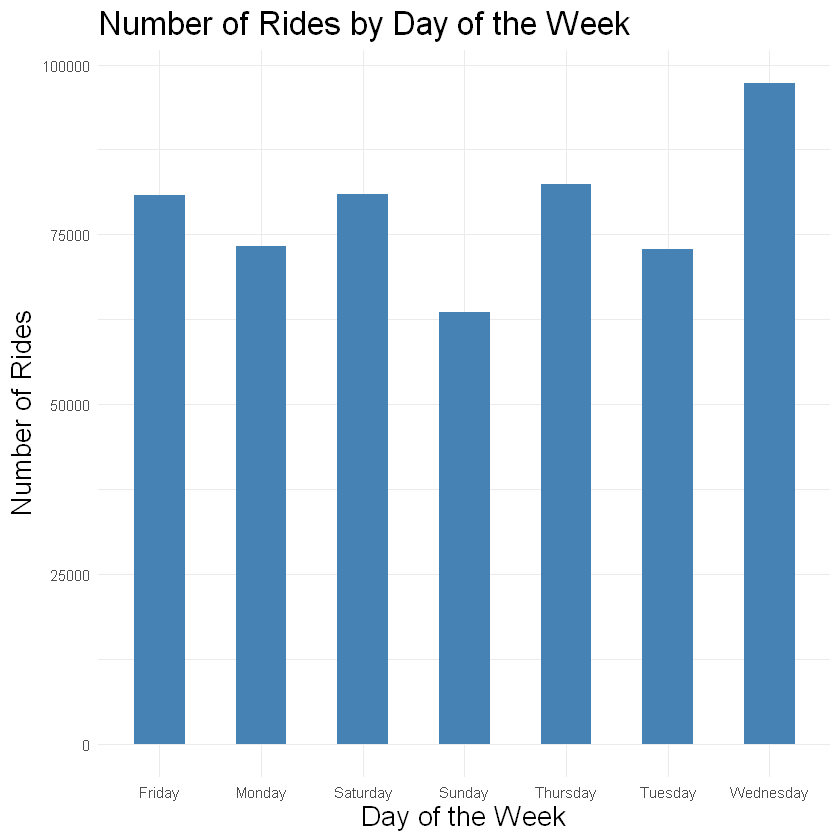

In [55]:
ggplot(day_of_week_data, aes(x = day_name, y = frequency)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.5) +
  labs(title = "Number of Rides by Day of the Week",
       x = "Day of the Week",
       y = "Number of Rides") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0),  
    axis.title.x = element_text(size = 16),          
    axis.title.y = element_text(size = 16)            
  )

**Step 2: Ride Behavior by Member Type**:

I explored the average ride length and ride frequency for members and casual riders across the days of the week:

* **Average Ride Length**:

To analyze the average ride length, I executed the following SQL query:

```sql

SELECT member_casual, day_of_week, ROUND(AVG(ride_length_minutes), 2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY member_casual, day_of_week;


```

result:

```sql

| member_casual  | day_of_week | avg_ride_length_minutes  |
|----------------|-------------|--------------------------|
| member         | 6           | 12.29                    |
| casual         | 5           | 20.46                    |
| member         | 5           | 11.88                    |
| member         | 7           | 14.22                    |
| member         | 2           | 11.78                    |
| member         | 4           | 12.18                    |
| casual         | 4           | 19.74                    |
| casual         | 7           | 26.25                    |
| member         | 3           | 11.82                    |
| member         | 1           | 13.73                    |
| casual         | 1           | 25.23                    |
| casual         | 2           | 21.22                    |
| casual         | 3           | 18.52                    |
| casual         | 6           | 22.00                    |


```

**Key findings**:

Casual riders had the longest average ride lengths on Sundays (`26.25 minutes`).

Members had shorter and more consistent ride lengths, averaging around `12-14 minutes` during the week.

* **Ride Count**:

To analyze ride frequency, I ran:

```sql

SELECT member_casual, day_of_week, COUNT(ride_id) AS ride_count
FROM combined_tripdata
GROUP BY member_casual, day_of_week;


```
result:

```sql

| member_casual  | day_of_week | ride_count |
|----------------|-------------|------------|
| member         | 6           | 50419      |
| casual         | 5           | 24953      |
| member         | 5           | 57474      |
| member         | 7           | 41819      |
| member         | 2           | 50496      |
| member         | 4           | 69162      |
| casual         | 4           | 28103      |
| casual         | 7           | 39111      |
| member         | 3           | 52901      |
| member         | 1           | 34808      |
| casual         | 1           | 28758      |
| casual         | 2           | 22781      |
| casual         | 3           | 19986      |
| casual         | 6           | 30317      |


```


**Key Insights**:

Members: Take more frequent rides with shorter durations.

Casual riders: Have fewer rides but longer durations, especially on weekends.

`Thursday`: Is the peak day for both members and casual riders.

Weekends: Casual riders tend to have longer rides on weekends, particularly on `Sundays`.





#### Visualization: Ride Count by Day of the Week

To illustrate the ride counts, I created a line chart:

In [57]:
ride_count_data <- read.csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/5-line_chart_ride_number_for_days_member_casual.csv")

In [58]:
ride_counts <- ride_count_data %>%
  group_by(day_name, member_casual) %>%
  summarise(ride_count = n(), .groups = "drop") 

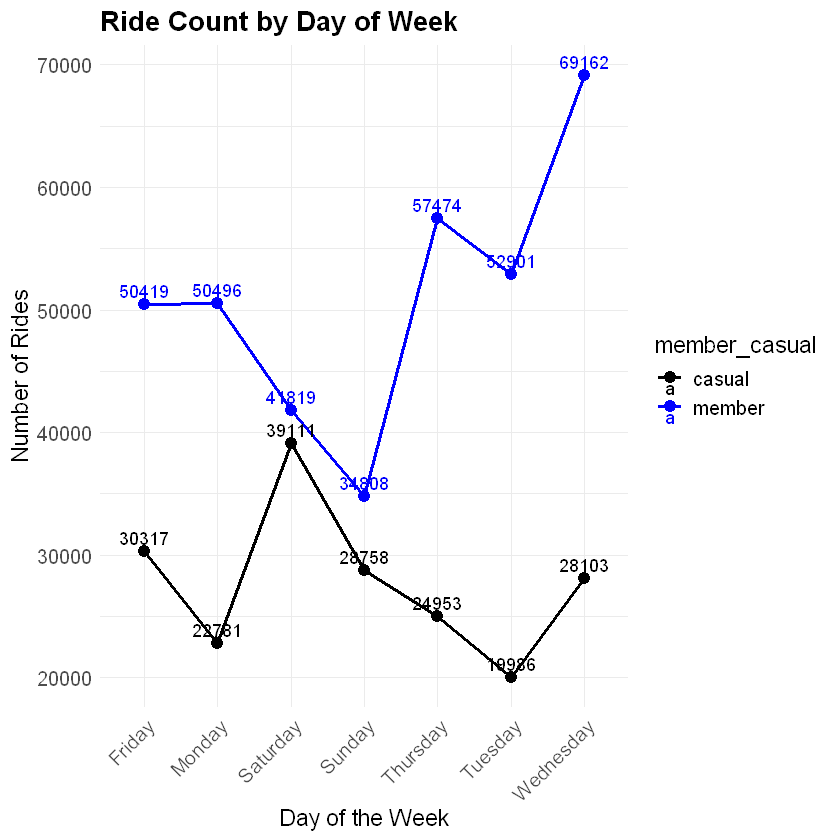

In [59]:
line_chart <- ggplot(ride_counts, aes(x = day_name, y = ride_count, color = member_casual, group = member_casual)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  geom_text(aes(label = ride_count), vjust = -0.5) + 
  labs(title = "Ride Count by Day of Week", x = "Day of the Week", y = "Number of Rides") +
  theme_minimal() +
  scale_color_manual(values = c("member" = "blue", "casual" = "black")) + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 14), 
    axis.title.y = element_text(size = 14),  
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),    
    axis.text.y = element_text(size = 12),    
    legend.title = element_text(size = 14),   
    legend.text = element_text(size = 12)       
  )

print(line_chart)

#### Visualization: Average Ride Length Heatmap

To further visualize average ride lengths, I created a heatmap:

In [61]:
avg_ride_length_data <- read.csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/6-average_ride_length_heatmap.csv")

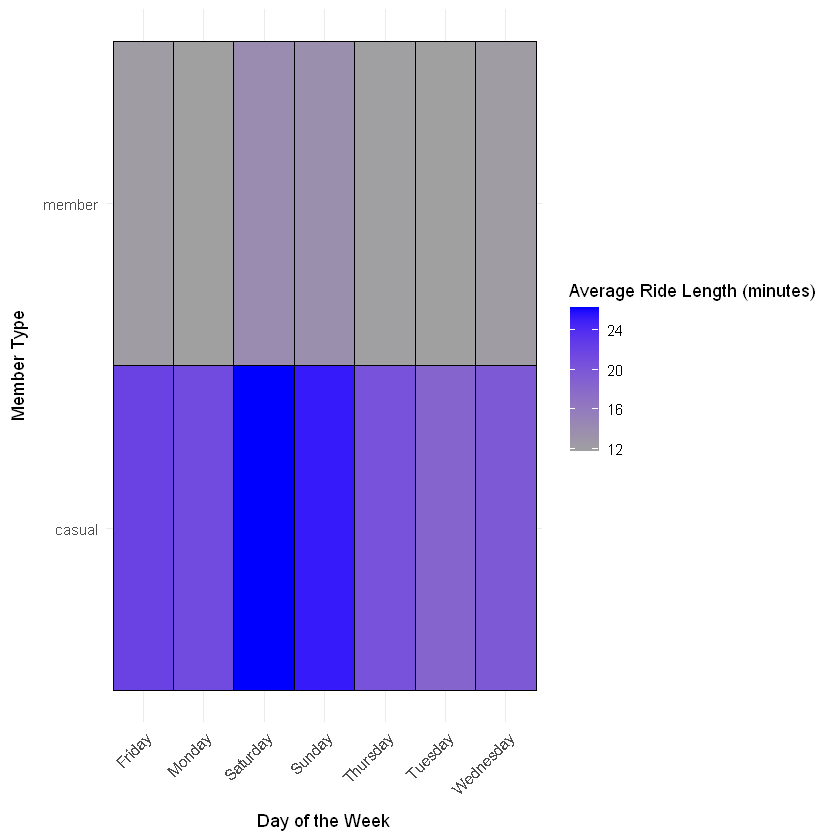

In [62]:
heatmap <- ggplot(avg_ride_length_data, aes(x = day_name, y = member_casual, fill = avg_ride_length_minutes)) +
  geom_tile(color = "black") +  
  scale_fill_gradient(low = "#a0a0a0", high = "blue") + 
  labs(x = "Day of the Week", y = "Member Type", fill = "Average Ride Length (minutes)") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  
    axis.title.x = element_text(margin = margin(t = 10)),  
    axis.title.y = element_text(margin = margin(r = 10))  
  )

print(heatmap)

**Step-3-Distribution of Rides by Day of the Week**:

To explore the distribution of rides across different days of the week, I performed a query to count the number of rides for each day.

```sql

SELECT day_of_week, COUNT(ride_id) AS ride_count
FROM combined_tripdata
GROUP BY day_of_week
ORDER BY ride_count DESC;


```
result:

```sql

| Day of Week | Ride Count |
|-------------|------------|
| 1           | 63566      |
| 2           | 73277      |
| 3           | 72887      |
| 4           | 97265      |
| 5           | 82427      |
| 6           | 80736      |
| 7           | 80930      |


```

* **Rides by Day of the Week and Member Type**:

I ran a query to count the number of rides for each day of the week, categorized by member and casual riders. This highlights differences in riding patterns between the two groups.

```sql
SELECT 
    day_of_week,
    member_casual,
    COUNT(ride_id) AS ride_count
FROM combined_tripdata
GROUP BY day_of_week, member_casual
ORDER BY day_of_week, ride_count DESC;

```

result:

```sql

| Day of Week | Member Type | Ride Count |
|-------------|-------------|------------|
| 1           | Member      | 34808      |
| 1           | Casual      | 28758      |
| 2           | Member      | 50496      |
| 2           | Casual      | 22781      |
| 3           | Member      | 52901      |
| 3           | Casual      | 19986      |
| 4           | Member      | 69162      |
| 4           | Casual      | 28103      |
| 5           | Member      | 57474      |
| 5           | Casual      | 24953      |
| 6           | Member      | 50419      |
| 6           | Casual      | 30317      |
| 7           | Member      | 41819      |
| 7           | Casual      | 39111      |


```

**Highest Usage Days**:

`Wednesday(4)`: Most rides overall
Weekend Days (`Saturday` and `Sunday`): Higher ride counts among casual riders
Key Findings:

Members show a more consistent ride count throughout the week.

Casual riders exhibit a peak on weekends, reflecting recreational usage.

Members' ride counts were more evenly distributed throughout the week, with slight peaks on `Wednesdays` and `Thursdays`.

#### Visualization: Rides by Day of the Week and Member Type

To better understand the differences in ride behavior between members and casual riders, I created a stacked bar chart. The following R code was used to visualize ride counts by day of the week and rider type:

In [63]:
stacked_ride_data <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/13-day_of_week_member_casual_ride_count.csv")

Rows: 14 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): member_casual
dbl (2): day_of_week, ride_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [64]:
day_names <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")


In [65]:
stacked_ride_data$day_of_week <- day_names[stacked_ride_data$day_of_week]


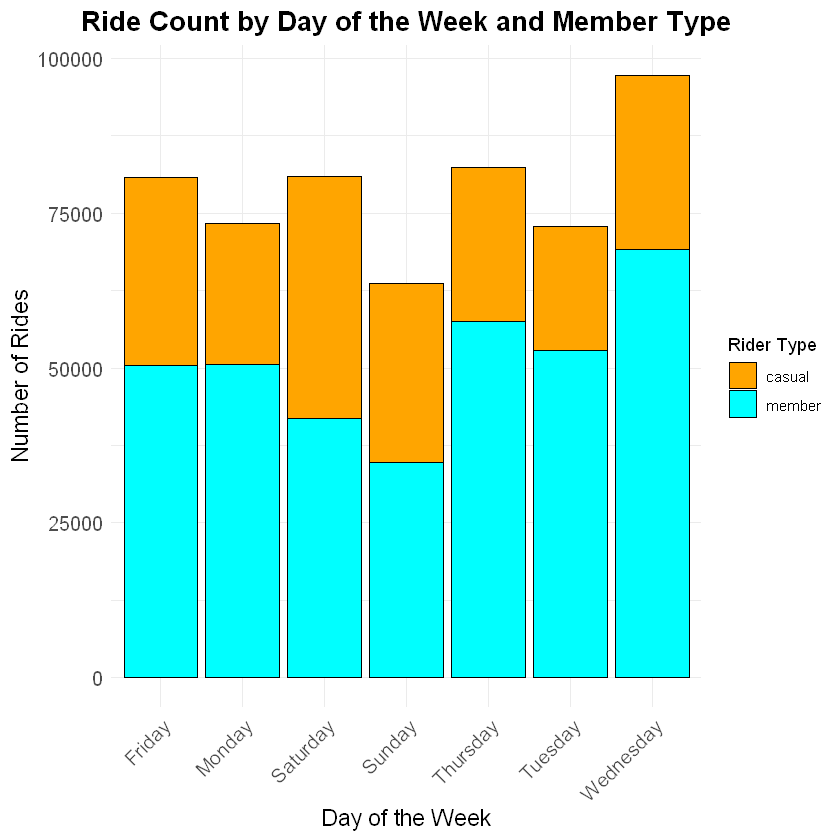

In [66]:
ggplot(stacked_ride_data, aes(x = day_of_week, y = ride_count, fill = member_casual)) +
  geom_bar(stat = "identity", position = "stack", color = "black") +  
  scale_fill_manual(values = c("member" = "cyan", "casual" = "orange")) +  
  labs(title = "Ride Count by Day of the Week and Member Type",
       x = "Day of the Week",
       y = "Number of Rides",
       fill = "Rider Type") +  
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),  
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),  
    axis.text.y = element_text(size = 12),  
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14)   
  )

**Step-4-Correlation between Ride Length and Station Start Location**:

To investigate if certain start locations are associated with longer ride durations, I analyzed the average ride length for each start station.

```sql

SELECT start_station_name, ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes, COUNT(ride_id) AS ride_count
FROM combined_tripdata
GROUP BY start_station_name
ORDER BY avg_ride_length_minutes DESC
LIMIT 10;


```
result:

```sql

| Start Station Name                                         | Average Ride Length (Minutes) |
|------------------------------------------------------------|-------------------------------|
| GLENLAKE AVE & PULASKI RD                                  | 262.84                        |
| PUBLIC RACK - HOLBROOK ST & MILWAUKEE AVE                  | 260.15                        |
| ALTGELD GARDENS                                            | 259.13                        |
| ROCKWELL ST & 63RD ST                                      | 163.19                        |
| CARPENTER ST & 63RD ST                                     | 133.29                        |
| BENNETT AVE & 79TH ST                                      | 112.52                        |
| STATE ST & 123RD ST                                        | 108.47                        |
| PUBLIC RACK - THE MONTESSORI SCHOOL OF ENGLEWOOD           | 95.27                         |
| PARKSIDE AVE & ARMITAGE AVE                                | 94.07                         |
| PUBLIC RACK - LAWRENCE AVE & KIMBALL AVE                   | 93.54                         |


```

**Key Findings**:

Some start stations exhibit much higher-than-average ride lengths. These may correspond to less frequented locations or routes used for longer, more recreational rides.

`GLENLAKE AVE & PULASKI RD` has the highest average ride length of `262.84 minutes`, indicating that riders may be taking exceptionally long trips from this location.

* **Correlation Between Ride Length and Station Start/End Locations**

The query investigates the average ride length between specific start and end station pairs, revealing the top 10 combinations with the longest ride durations.

```sql

SELECT 
    start_station_name,
    end_station_name,
    ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY start_station_name, end_station_name
ORDER BY avg_ride_length_minutes DESC
LIMIT 10;


```
result:
```sql

| Start Station Name                                        | End Station Name                                   | Average Ride Length (Minutes) |
|-----------------------------------------------------------|----------------------------------------------------|-------------------------------|
| ASHLAND AVE & CHICAGO AVE                                 | KEDZIE AVE & MILWAUKEE AVE                         | 629.92                        |
| INDIANA AVE & ROOSEVELT RD                                | WINTHROP AVE & LAWRENCE AVE                        | 551.80                        |
| RUSH ST & HUBBARD ST                                      | NEW HASTINGS                                       | 547.03                        |
| WESTERN AVE & WALTON ST                                   | CAMPBELL AVE & FULLERTON AVE                       | 542.90                        |
| ELLIS AVE & 60TH ST                                       | RICHMOND ST & 59TH ST                              | 519.97                        |
| WALDEN PKWY & 100TH ST                                    | HALE AVE & 107TH ST                                | 516.43                        |
| DESPLAINES ST & RANDOLPH ST                               | WESTERN AVE & WINNEBAGO AVE                        | 513.90                        |
| GLENLAKE AVE & PULASKI RD                                 | KOSTNER AVE & BRYN MAWR AVE                        | 490.28                        |
| RUSH ST & SUPERIOR ST                                     | DODGE AVE & MAIN ST                                | 483.48                        |
| CLARK ST & ARMITAGE AVE                                   | DEARBORN ST & MONROE ST                            | 467.00                        |


```

**Key Findings**:

High Ride Durations: Some pairs, like `Ashland Ave & Chicago Ave` to `Kedzie Ave & Milwaukee Ave`, show average ride times over `10 hours`, suggesting potential irregular usage or technical issues.

Diverse Locations: The listed stations span various areas, indicating that long rides may relate to specific travel purposes or geographic factors.

Lower Frequency: These pairs likely have fewer trips, pointing to routes primarily used for leisure or non-commuter travel.

**Step-5-Correlation between Member Type and Ride Count by Day of the Week**:

To analyze the ride count based on member type and the day of the week, I executed the following SQL query:

```sql
SELECT member_casual, day_of_week, COUNT(ride_id) AS ride_count
FROM combined_tripdata
GROUP BY member_casual, day_of_week
ORDER BY member_casual, day_of_week;

```
result:

```sql

| Member Type | Day of Week | Ride Count |
|-------------|-------------|------------|
| Casual      | 1           | 28758      |
| Casual      | 2           | 22781      |
| Casual      | 3           | 19986      |
| Casual      | 4           | 28103      |
| Casual      | 5           | 24953      |
| Casual      | 6           | 30317      |
| Casual      | 7           | 39111      |
| Member      | 1           | 34808      |
| Member      | 2           | 50496      |
| Member      | 3           | 52901      |
| Member      | 4           | 69162      |
| Member      | 5           | 57474      |
| Member      | 6           | 50419      |
| Member      | 7           | 41819      |


```

**Key Findings**:

Members have a more even distribution of rides across the week, whereas casual riders peak on weekends.


**Step-6-Correlation between Ride Length and Station End Location**:

Next, I explored the correlation between ride lengths and the end station locations using the following SQL query:

```sql

SELECT end_station_name, ROUND(AVG(ride_length_minutes),2) AS avg_ride_length_minutes
FROM combined_tripdata
GROUP BY end_station_name
ORDER BY avg_ride_length_minutes DESC
LIMIT 10;


```
result:

```sql

| End Station Name                                                | Average Ride Length (Minutes)  |
|-----------------------------------------------------------------|--------------------------------|
| NEW HASTINGS                                                    | 192.00                         |
| PUBLIC RACK - KINZUA AVE & DEVON AVE                            | 169.60                         |
| BLOOMINGDALE AVE & HARLEM AVE                                   | 151.56                         |
| PUBLIC RACK - LAMON AVE & ERIE ST                               | 128.52                         |
| PUBLIC RACK - KILDARE AVE & WASHIGNTON BLVD                     | 119.08                         |
| PUBLIC RACK - OVERHILL AVE & TOUHY AVE                          | 109.84                         |
| MAJOR AVE & BLOOMINGDALE AVE                                    | 107.05                         |
| KILDARE AVE & 85TH ST (KOSTNER AVE & 87TH ST TEMPORARY)         | 96.88                          |
| STONY ISLAND AVE & 90TH ST                                      | 81.97                          |
| STATE ST & 123RD ST                                             | 76.37                          |


```

**Key Findings**:

Similar to start stations, some end stations show higher average ride lengths, suggesting potential areas of interest or longer trips.


**Step-7-Correlation between Hour of Day and Member Type**:

I analyzed the relationship between the hour of the day and member type with the following SQL query:

```sql

SELECT HOUR(started_at) AS hour_of_day, member_casual, COUNT(ride_id) AS ride_count
FROM combined_tripdata
GROUP BY hour_of_day, member_casual
ORDER BY hour_of_day;


```
result:

```sql

| Hour of Day | Member Type | Ride Count |
|-------------|-------------|------------|
| 0           | Casual      | 3049       |
| 0           | Member      | 2891       |
| 1           | Casual      | 2148       |
| 1           | Member      | 1722       |
| 2           | Casual      | 1362       |
| 2           | Member      | 1021       |
| 3           | Casual      | 693        |
| 3           | Member      | 676        |
| 4           | Casual      | 501        |
| 4           | Member      | 827        |
| 5           | Casual      | 1173       |
| 5           | Member      | 3893       |
| 6           | Casual      | 2434       |
| 6           | Member      | 10980      |
| 7           | Casual      | 4497       |
| 7           | Member      | 20026      |
| 8           | Casual      | 6461       |
| 8           | Member      | 24364      |
| 9           | Casual      | 6397       |
| 9           | Member      | 16151      |
.
.
.
-- upto 23 hours


```


**Key Findings**:

​
Similar to start stations, some end stations show higher average ride lengths, suggesting potential areas of interest or longer trips.




**Visualization: Ride Count Heatmap**

To visualize the relationship between hour of the day and member type, I created a heatmap:

In [67]:
ride_data_heatmap <- read_csv("C:/Users/saswa/Documents/GitHub/Cyclistic-Bike-Share--Analyzing-Rider-Behavior/Data/viz data/14-hour_of_day_member_causal_ride_count.csv")

Rows: 48 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): member_casual
dbl (2): hour_of_day, ride_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


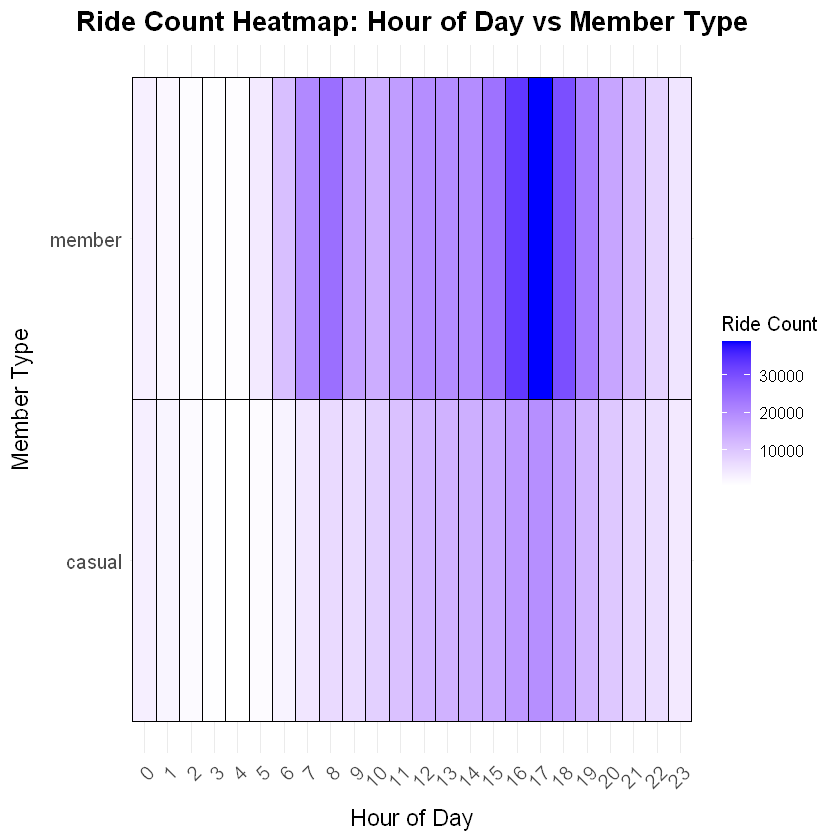

In [68]:
ggplot(ride_data_heatmap, aes(x = factor(hour_of_day), y = member_casual, fill = ride_count)) +
  geom_tile(color = "black") +  
  scale_fill_gradient(low = "white", high = "blue") +  
  labs(title = "Ride Count Heatmap: Hour of Day vs Member Type",
       x = "Hour of Day",
       y = "Member Type",
       fill = "Ride Count") +  
  theme_minimal() +  
  theme(
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),  
    axis.text.y = element_text(size = 12),  
    axis.title.x = element_text(size = 14, margin = margin(t = 10)),  
    axis.title.y = element_text(size = 14, margin = margin(r = 10)),  
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5), 
    legend.title = element_text(size = 12),  
    legend.text = element_text(size = 10)  
  )

### Conclusion

In conclusion, my analysis highlighted significant differences in the behavior of annual members and casual riders. While members exhibit consistent ride patterns with shorter durations, casual riders tend to use bikes more on weekends and have longer rides, particularly on Sundays.

**Key Insights Recap:**

* Members show a steady usage throughout the week, while casual riders peak on weekends.

* The visualizations effectively communicate these findings and make the data more accessible to the executive team.

## Act

### **Final Conclusion**

From the analysis of Cyclistic’s bike usage data, we observed distinct differences between **casual riders** and **annual members** in terms of **ride length, peak usage hours, and ride purpose**. **Members** tend to take **shorter rides**, especially during **peak commuting hours**, while **casual riders** engage in **longer, more leisurely rides, particularly during mid-day and weekends**. These insights provide clear opportunities to tailor marketing strategies to convert **casual riders into annual members** by addressing their **specific needs and usage patterns**.

#### **Top Three Recommendations**

**Promote Leisure Riding Benefits**: **Casual riders** are more likely to engage in **extended, recreational rides, particularly on weekends** and during **off-peak hours**. Cyclistic can develop marketing campaigns that emphasize the benefits of **membership for longer rides**, such as **discounted extended ride options** or **scenic route suggestions**. By positioning **membership** as a **value-add for leisure riders**, Cyclistic can attract **casual riders** who regularly engage in **longer trips**.

**Offer Off-Peak Discounts**: Since **casual riders** dominate **off-peak hours**, Cyclistic could introduce **promotions or discounted rates** for rides during these times. This strategy can incentivize **casual riders** to use the service more frequently and potentially consider a **membership for long-term savings**. **Targeted offers**, such as **reduced fees for rides between 10 AM and 3 PM**, can convert casual riders who prefer riding during **non-commuting hours**.

**Time-Based Membership Features**: Many **casual riders** prefer **mid-day and weekend rides**, while members tend to use bikes for **commuting during peak hours**. Cyclistic could introduce **flexible, time-based membership options** that cater to this behavior, such as **weekend-only memberships or pay-per-hour passes** that offer a **middle ground between casual riding and full membership**. Highlighting the **convenience and cost-effectiveness** of such options could appeal to **casual riders hesitant to commit to an annual plan**.

#### **Application of Insights**

These findings can be applied to develop targeted **marketing campaigns, refine pricing strategies, and optimize customer engagement**. Tailoring **membership features and promotions** to the distinct patterns of **casual riders** will increase the **likelihood of converting them to members**. The Cyclistic marketing team could leverage these insights in **personalized emails, app notifications, and social media campaigns** aimed at **casual riders who frequently take long rides or ride during off-peak hours**.

#### **Next Steps**

**Pilot New Membership Options**: Test new time-based or weekend membership packages with a selected group of casual riders.

**Expand Data Analysis**: Further analyze rider demographics and preferences to refine marketing efforts and ensure targeted messaging.

**Continuous Optimization**: Monitor the success of promotional offers and membership options through A/B testing and customer feedback.

#### **Additional Data**

To deepen this analysis, more granular data on demographics, rider motivations, and geographical locations would help further tailor marketing strategies and understand the key factors influencing casual rider behavior.